## Task 1.1 Import your own dataset into Jupyter environment

In [114]:
import numpy as np
import PIL.Image
import matplotlib.pyplot as plt
import os 

In [115]:
def get_images() -> list:
    image_folder_path = "./images"
    
    image_paths = []
    for _, _,files in os.walk(image_folder_path):
        image_paths = files
        break

    images_list = []

    for img_file in image_paths:
        # Open the image
        img_path = os.path.join(image_folder_path, img_file)
        with PIL.Image.open(img_path) as img:
            # Convert to RGB (in case it's a different mode like RGBA or grayscale)
            img = img.convert('RGB')
            
            x = y = 32
            # Resize to desired resolution (x,y)
            img = img.resize((x, y))
            
            # Convert to numpy array
            img_array = np.array(img)
            
            # Append to the list
            images_list.append(img_array)

    
    dataset_array = np.stack(images_list, axis=0)
    # set of numpy arrays (n, x, y, 3)

    return dataset_array

In [116]:
def PlotSample(sample_image):
    plt.imshow(sample_image)
    plt.axis('off')  # Hide axes
    plt.show()

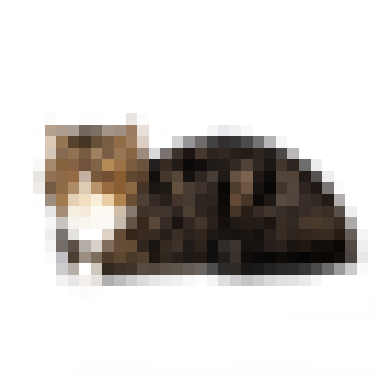

In [117]:
x = get_images()
PlotSample(x[2])

## Follow the tutorial “Preprocessing for deep learning”

In [118]:
def reshape(images: np.array) -> np.array:
    # Reshape to (n, x*y*3)
    return images.reshape(images.shape[0], images.shape[1]*images.shape[2]*images.shape[3])

In [119]:
def plot_reshaped(image: np.array) -> None:
    # Plot reshaped images
    x = y = 32
    plt.imshow(image.reshape(x, y, 3))
    plt.axis('off')  # Hide axes
    plt.show()

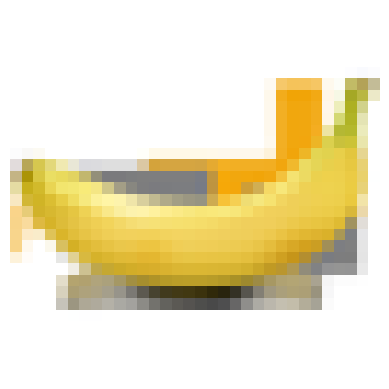

In [120]:
image = reshape(x)
plot_reshaped(image[1, :])

In [124]:
def get_ZCA_rescaled(image, epsilon: float = 0.1) -> np.array:
    normalized = image / 255
    normalized = normalized - normalized.mean(axis=0)
    cov = np.cov(normalized, rowvar=False)
    U, S, V = np.linalg.svd(cov)
    print(U.shape, S.shape, V.shape)
    X_ZCA = U.dot(np.diag(1.0/np.sqrt(S + epsilon))).dot(U.T).dot(normalized.T).T
    X_ZCA_rescaled = (X_ZCA - X_ZCA.min()) / (X_ZCA.max() - X_ZCA.min())
    return X_ZCA_rescaled

(3072, 3072) (3072,) (3072, 3072)


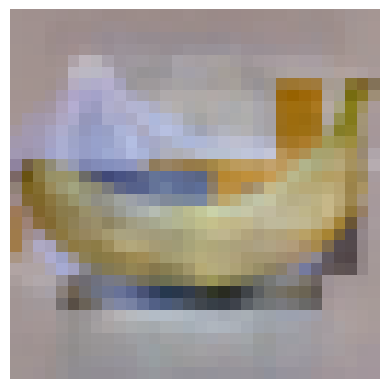

In [125]:
x = get_images()
image = reshape(x)
whitened_images = get_ZCA_rescaled(image)
plot_reshaped(whitened_images[1, :])